<FONT color = '#008080' SIZE='20'><h1><I>analysing TMDb movie data </I></h1></FONT>
<hr>
<br>

# there is some question we seek to find an answer for 

1. what is the common genre of all time?


2. what is the most common genre per year?


3. what is the year every genre was produced the most?


4. what is the most month, year, and day of releasing movies?


5. what is the revinue timeline over years?


6. what is the budget timeline over years?
 
 
7. what are the moves with highest income?
 
 
8. what  are the most expensive movies of all years?


9. what  are the most popular movies of all years?


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
# to run more than output in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


will use `pd.read_csv` to read the csv and store it in a dataframe 

`pd.options.display.max_columns=50` to prevent pandas from truncate coumns

In [2]:
df = pd.read_csv(r'data\tmdb-movies.csv')
pd.options.display.max_columns=50

#  exploring the data

In [3]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

+ there is some missing values 


* **mdb_id** have missing value so `original_title` will be the unique id


   | colum       | not null   |null
    |------------|------------|-----   
    |**imdb_id**  |         10856 |10
    |cast         |         10790|76
    |homepage     |         2936|7930
    |director     |         10822|44
    |tagline      |         8042|2824
    |keywords     |         9373|1493
    |overview     |         10862|4
    |**genres**   |         10843|23
    |production_companies | 9836|1030


* release_date  is a string instead of dateTime
 

# proccessing data

genre have multiple values need to be separated 

by using `.str.split()` and set expand to `True` to to store them into new columns


In [5]:
# to split cast into separate columns
df[['genre1','genre2','genre3','genre4','genre5']] = df['genres'].str.split("|", expand = True)

<br>
<font color = #ff0000 size = 5%>1. what is the common genre of all time?</font>
<hr>

in the next cell we takes each genre column:


* group them by`[release_year ,genre]` 

* count there amount then unstack them to cearte a data frame *and replace NaN with

`common_genre_of_all_time` the most produced genre according to the data

In [6]:
genres_col = ['genre2','genre3','genre4','genre5']

first= df.groupby(by=['release_year','genre1']).original_title.count().unstack(fill_value=0)
all_genre =first

for genre in genres_col:
    all_genre = all_genre.add(df.groupby(by=['release_year',genre]).original_title.count().unstack(fill_value=0),fill_value=0)

common_genre_of_all_time = all_genre.sum(axis=0 )




sorting `common_genre_of_all_time`


## visualizing the data

In [7]:
plot_data = common_genre_of_all_time.sort_values(ascending=False)
plot_data

Drama              4761.0
Comedy             3793.0
Thriller           2908.0
Action             2385.0
Romance            1712.0
Horror             1637.0
Adventure          1471.0
Crime              1355.0
Family             1231.0
Science Fiction    1230.0
Fantasy             916.0
Mystery             810.0
Animation           699.0
Documentary         520.0
Music               408.0
History             334.0
War                 270.0
Foreign             188.0
TV Movie            167.0
Western             165.0
dtype: float64

In [8]:
def viz_hbar(x,y,title,xlabel,ylabel):
    """take a x and y data (both of then are arraylike)
    title, ylabel and xlabel to visualize a bar to specific preferences"""
    %matplotlib inline
    plt.figure(figsize=(8,8))
    plt.style.use('ggplot')
    plt.barh(x,y,label= title)
    plt.title(title, fontdict={'color': "#008080",'fontsize': '20' ,'fontweight':'bold' })
    plt.ylabel(ylabel,fontdict={'color': "#008080",'fontsize': '15' })
    plt.xlabel(xlabel,fontdict={'color': "#008080",'fontsize': '15' })
    plt.grid(True)
    plt.tight_layout()
    plt.show();

converting `plot_data.values` from float64 to int to be able to visualize 

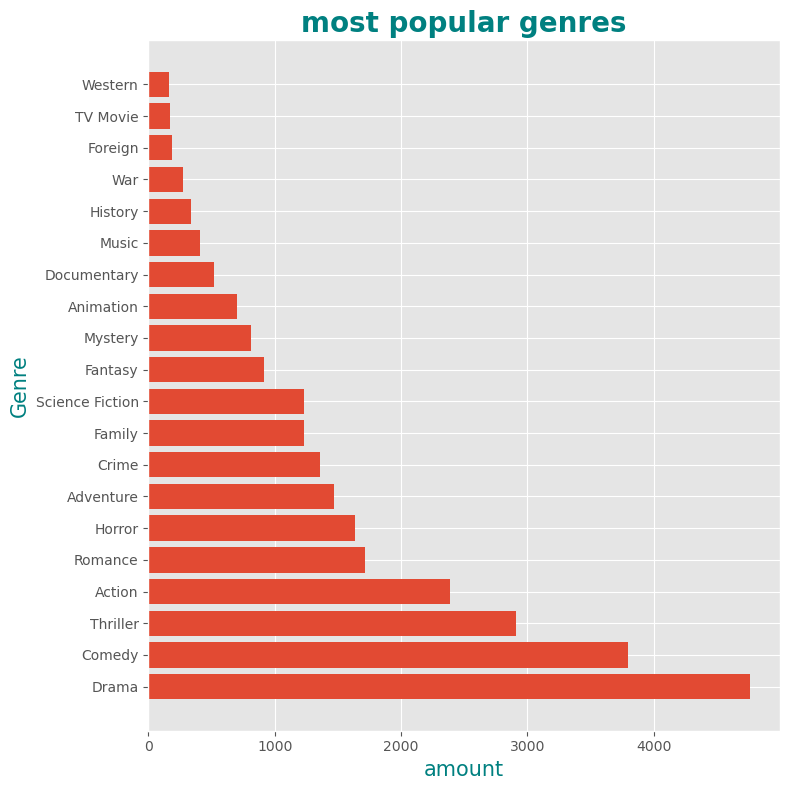

In [10]:
x=plot_data.index
y=(plot_data.values.astype('int'))
viz_hbar(x,y,title ='most popular genres',ylabel='Genre',xlabel='amount')

### visualizing the most  6 genres hane been produced

C:\Users\DELL\AppData\Local\Temp\ipykernel_10576\539690487.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels=pd.Series(plot_data.index[:6]).append(pd.Series('other'))
C:\Users\DELL\AppData\Local\Temp\ipykernel_10576\539690487.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_data =pd.Series(plot_data.values[:6]).append(pd.Series((plot_data.sum()-plot_data[:6].sum())))


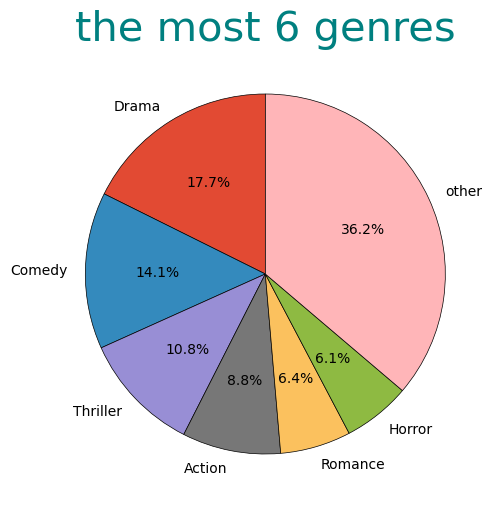

In [11]:
plt.style.use('ggplot')
labels=pd.Series(plot_data.index[:6]).append(pd.Series('other'))

pie_data =pd.Series(plot_data.values[:6]).append(pd.Series((plot_data.sum()-plot_data[:6].sum())))

plt.pie(pie_data, labels=labels, wedgeprops={'edgecolor':'black'},startangle=90, autopct='%1.1f%%')

plt.tight_layout()
plt.title('the most 6 genres',fontdict={'color': "#008080",'fontsize': '30' })
plt.show();
plt.style.use('default');

<br>
<font color = #ff0000 size = 5%>2. what is the most common genre per year?</font>
<hr>

In [12]:
max_genre_per_year = all_genre.idxmax(axis=1)
max_genre_per_year

release_year
1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966    Comedy
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984     Drama
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
dtype: object

### **drama and comedy are on the top of all years**

*count of years for Drama and Comedy*

In [13]:
max_genre_per_year.groupby(max_genre_per_year.values).size()

Comedy    10
Drama     46
dtype: int64

<br>
<font color = #ff0000 size = 5%>3. what is the year every genre was produced the most?</font>
<hr>

in the next cell we take `all_genre` dataframe:


* filtering `all_genre` to get the max genre of each year


* loop the filtered data to get the genre_name, year, and produc amount
* droping NaN values if found

In [14]:
filt=all_genre == all_genre.max()
genre_name=[]
genre_year=[]
genre_amount = []
for genre in all_genre.columns:
    filtered_genre=all_genre[filt]
    
    genre_name.append(filtered_genre[genre].dropna().name)
    genre_year.append( filtered_genre[genre].dropna().index[0])
    genre_amount.append(filtered_genre[genre].dropna().values[0])

In [15]:
max_year_per_genre = pd.DataFrame([genre_name,genre_year,genre_amount],index=['genre','year','amount']).transpose()
max_year_per_genre.groupby(['year', 'genre']).count()

amount
year genre                  
1970 Western               1
2008 Foreign               1
     History               1
2009 Adventure             1
     Comedy                1
     Fantasy               1
     Mystery               1
2010 Animation             1
     Romance               1
2011 Family                1
2013 Crime                 1
2014 Action                1
     Documentary           1
     Drama                 1
     Thriller              1
     War                   1
2015 Horror                1
     Music                 1
     Science Fiction       1
     TV Movie              1

## preparing dates for proccessing

* using `.str.split("/")` to split the ralease date and `apply` to get the month then save them in `df['release_month']`


* convert `df['release_month']` from str to numeric value  by using `pd.to_numeric`


* using `pd.to_datetime` to convert date_release to datetime


* using `df['release_day'].dt.strftime("%a")` to get the corresponding day of the date


In [16]:
df['release_month'] =  df['release_date'].str.split("/").apply(lambda x :x[0])
df['release_month'] = pd.to_numeric(df['release_month'])
df['release_day'] = pd.to_datetime(df['release_date'])
df['release_day']= df['release_day'].dt.strftime("%a")

<br>
<font color = #ff0000 size = 5%>4. what is the most month, year, and day of releasing movies?</font>
<hr>

In [17]:
most_common_day = df.groupby('release_day').size().sort_values(ascending=False)

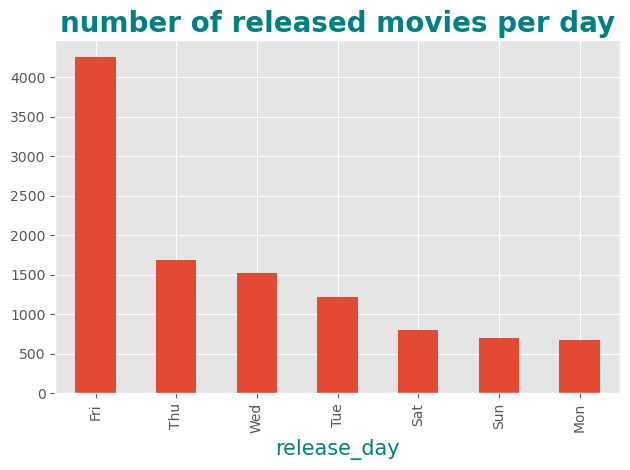

In [18]:
plt.style.use('ggplot')
most_common_day.plot(kind = 'bar' ,x=most_common_day.index,y=most_common_day.values,
                     style = 'ggplot',grid = True);
plt.title('number of released movies per day',fontdict={'color': "#008080",'fontsize': '20' ,'fontweight':'bold' })
plt.xlabel('release_day',fontdict={'color': "#008080",'fontsize': '15' })
plt.grid(True)
plt.tight_layout()
plt.show();

In [19]:
def viz_line(x,y,title,xlabel):
    """take a x and y data (both of then are arraylike)
    title, ylabel and xlabel to visualize a bar to specific preferences"""
    %matplotlib inline
    plt.figure(figsize=(9,9))
    plt.style.use('ggplot')
    plt.plot(x,y,'r:o',label = title )
    plt.title(title,fontdict={'color': '#008080','fontsize': '20' })
    plt.xlabel(xlabel,fontdict={'color': "#008080",'fontsize': '15' })
    plt.show();

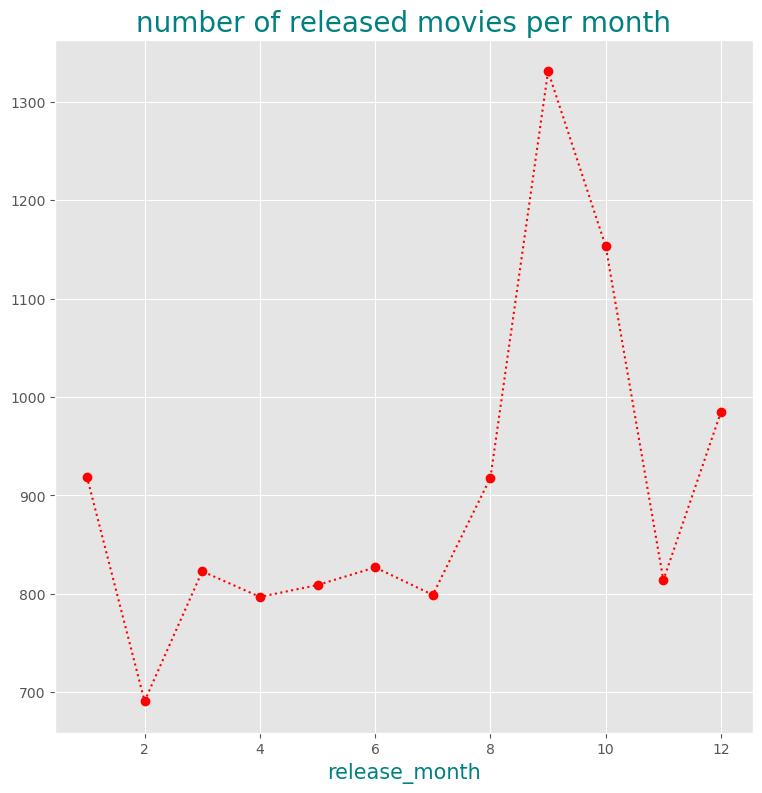

In [20]:
most_common_month = df.groupby('release_month').size().sort_index(ascending=False)

x=most_common_month.index
y=most_common_month.values

viz_line(x,y,'number of released movies per month','release_month')

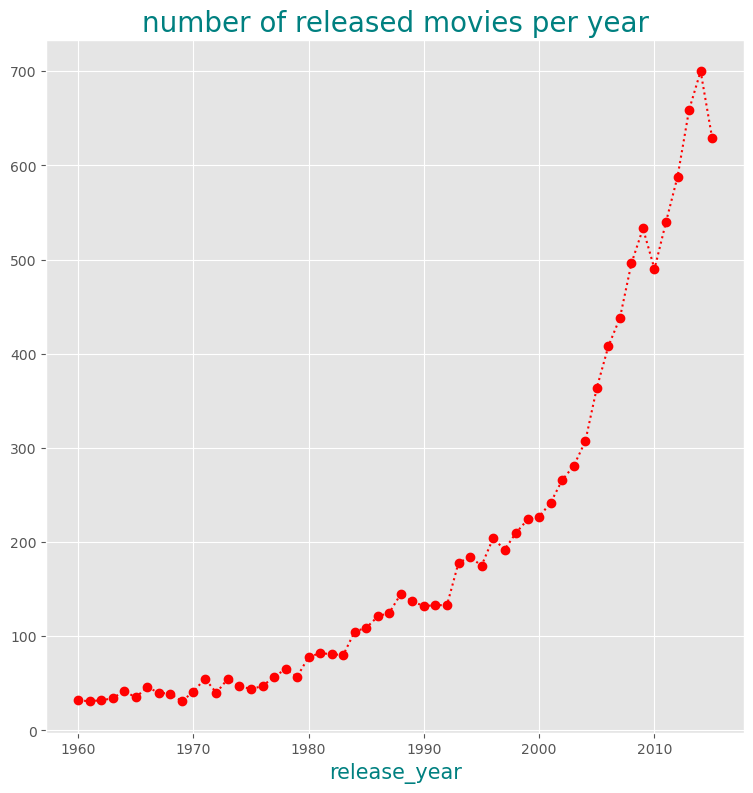

In [21]:
most_common_year = df.groupby('release_year').size().sort_index(ascending=False)

x=most_common_year.index
y=most_common_year.values
viz_line(x,y,'number of released movies per year','release_year')

## revenue over years

<br>
<font color = #ff0000 size = 5%>5. what is the revinue timeline over years?</font>
<hr>

In [22]:
rev_per_year=df.groupby('release_year').sum()['revenue']

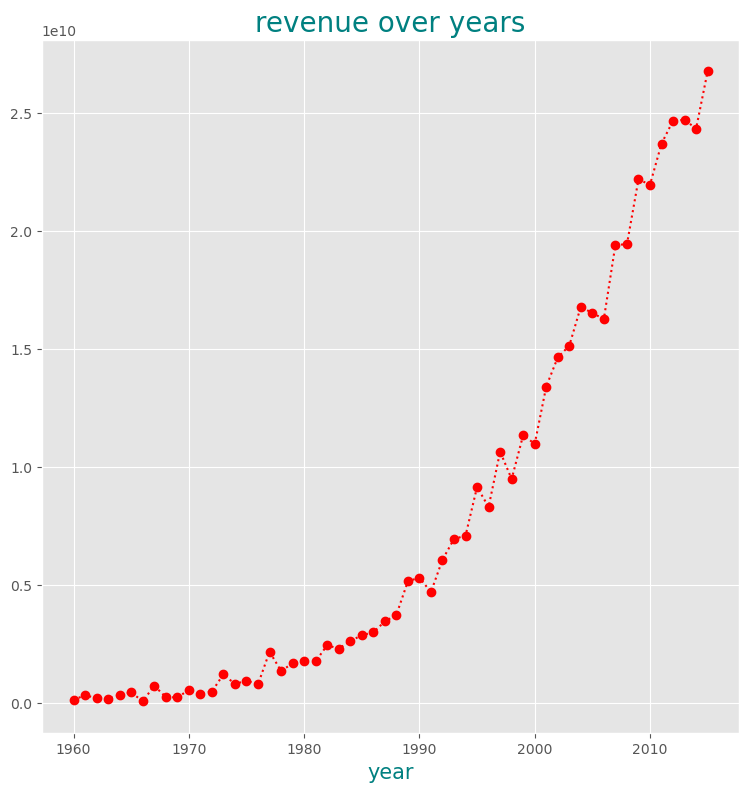

In [23]:
x = rev_per_year.index
y = rev_per_year.values
viz_line(x,y,'revenue over years','year')

<br>
<font color = #ff0000 size = 5%>6. what is the budget timeline over years?</font>
<hr>

In [24]:
bud_per_year=df.groupby('release_year').sum()['budget'].dropna()

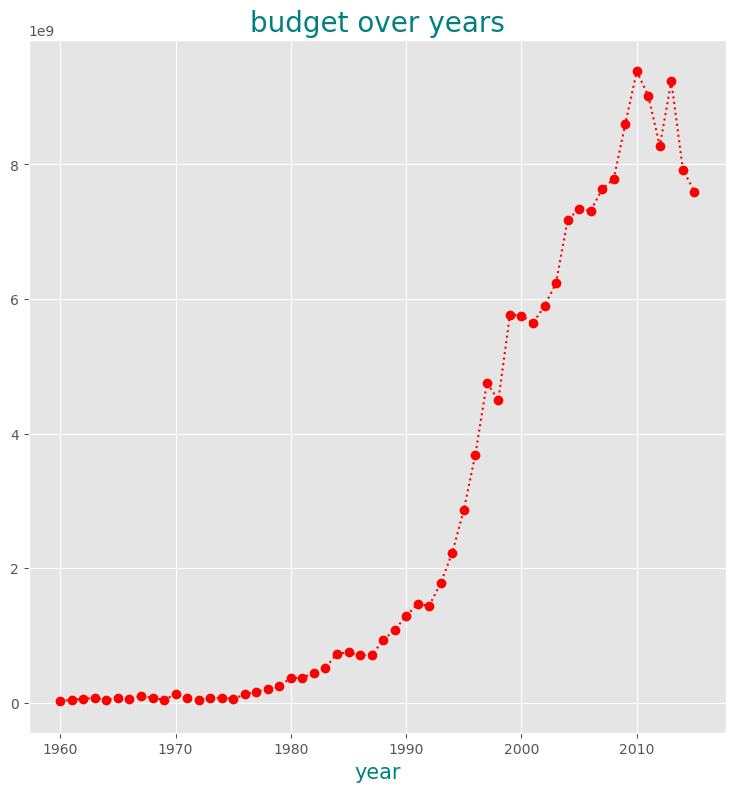

In [25]:
x = bud_per_year.index
y = bud_per_year.values
viz_line(x,y,'budget over years','year')

<br>
<font color = #ff0000 size = 5%>7. what are the moves with highest income?</font>
<hr>

In [26]:
highest_rev=df.sort_values(by='revenue',ascending=False)
highest_ten=highest_rev[['original_title','revenue']][:10]

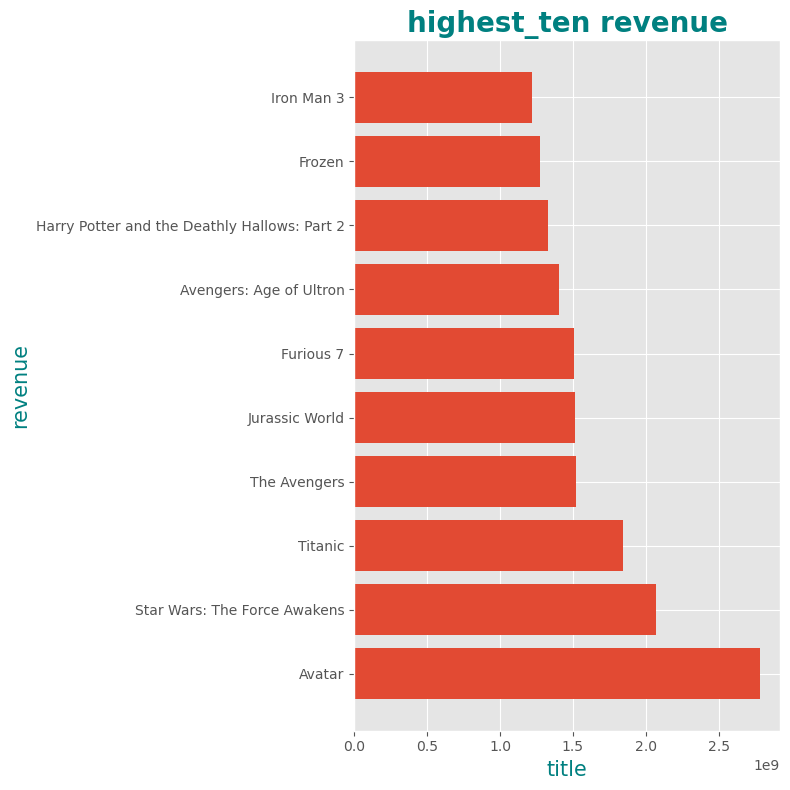

In [27]:
x=highest_ten['original_title']
y=highest_ten['revenue']
viz_hbar(x,y,'highest_ten revenue','title','revenue')

<br>
<font color = #ff0000 size = 5%>8. what is are the most expensive movies of all years?</font>
<hr>

In [28]:
highest_bud=df.sort_values(by='budget',ascending=False)
highest_ten_bud=highest_bud[['original_title','budget']][:10]
# highest_ten_bud

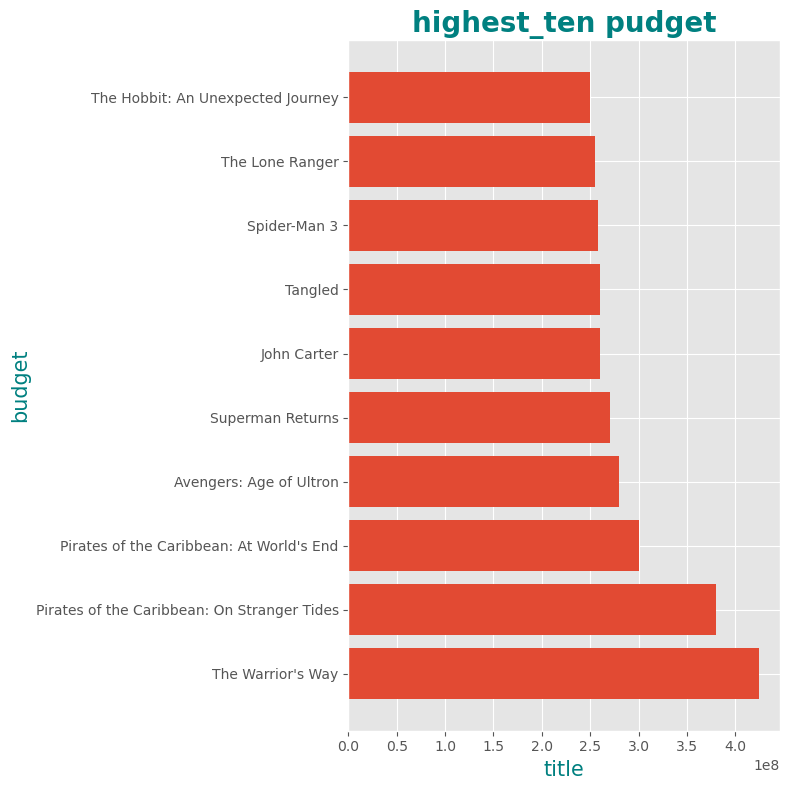

In [29]:
x = highest_ten_bud['original_title']
y = highest_ten_bud['budget']
viz_hbar(x,y,'highest_ten pudget','title','budget')

<br>
<font color = #ff0000 size = 5%>9. what is are the most popular movies of all years?</font>
<hr>

In [30]:
highest_popularity =df.sort_values(by='popularity',ascending=False)
highest_ten_popular=highest_popularity[['original_title','popularity']][:10]

In [31]:
highest_ten['original_title']
highest_ten_bud['original_title']

1386                                          Avatar
3                       Star Wars: The Force Awakens
5231                                         Titanic
4361                                    The Avengers
0                                     Jurassic World
4                                          Furious 7
14                           Avengers: Age of Ultron
3374    Harry Potter and the Deathly Hallows: Part 2
5422                                          Frozen
5425                                      Iron Man 3
Name: original_title, dtype: object

2244                              The Warrior's Way
3375    Pirates of the Caribbean: On Stranger Tides
7387       Pirates of the Caribbean: At World's End
14                          Avengers: Age of Ultron
6570                               Superman Returns
4411                                    John Carter
1929                                        Tangled
7394                                   Spider-Man 3
5508                                The Lone Ranger
4367              The Hobbit: An Unexpected Journey
Name: original_title, dtype: object

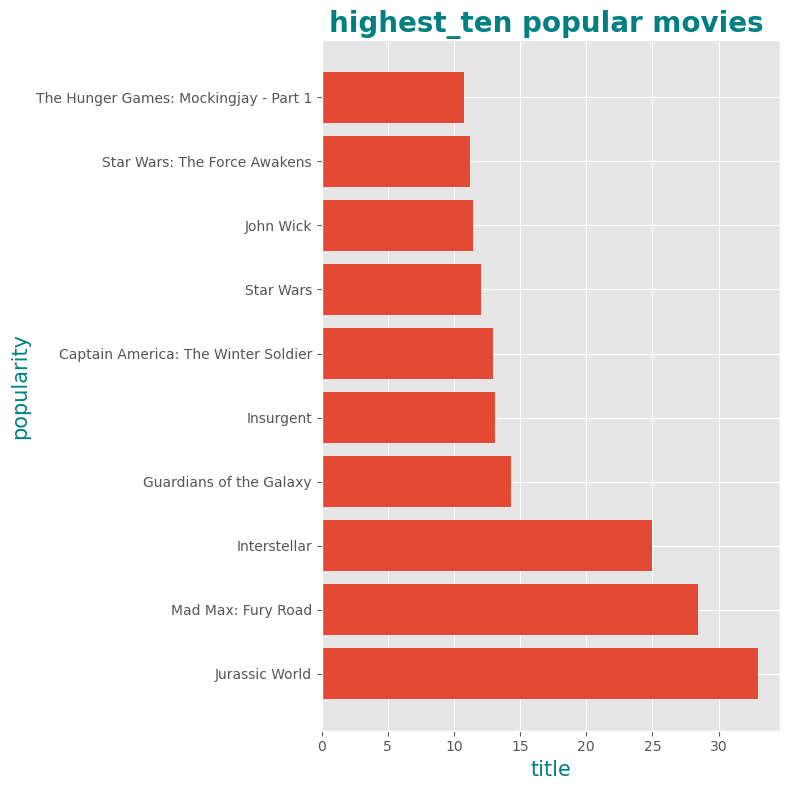

In [32]:
x = highest_ten_popular['original_title']
y = highest_ten_popular['popularity']
viz_hbar(x,y,'highest_ten popular movies ','title','popularity')

<br>
<font color = #800080 size = 10%><i><b>conclusion </font>
<hr>

* Drama and comedy  are the most genre of all time and nost produced each year


* most release movies at Friday  and thursday


* releases increase during August and October than the rest oh the year


* over  time released movies increase, reflecting on budget and revenue


* higher higher popularity doesn't mean budget or revenue 


### **limitation**

missing value in buget after 2010 can be seen in the viz 